In [1]:
import ast
import operator
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Prints most influential positive and negative terms from the movies overview. Later we could extend this to analyse movies scripts.

In [2]:
TMDB_MOVIES_COLUMN_NAMES = [
    'adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id',
    'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies',
    'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
    'video', 'vote_average', 'vote_count',
]

def load_tmdb_movies():
    df = pd.read_csv('Milestone_1/tmdb_movies_11291.csv', header=None, names=TMDB_MOVIES_COLUMN_NAMES)
    for column_name in ['genres', 'spoken_languages']:
        df[column_name] = df[column_name].map(lambda d: ast.literal_eval(d))
    return df

In [3]:
tmdb_movies_df = load_tmdb_movies()

In [4]:
tmdb_movies_df['release_date']  = pd.to_datetime(tmdb_movies_df['release_date'])
tmdb_movies_df['year'] = tmdb_movies_df['release_date'].map(lambda x: x.year)

In [5]:
def financeByGenre(df, genre_name):
    def hasGenre(genres, genre_name):
        for genre in genres:
            if(genre['name'] == genre_name):
                return True
        return False
    d = df[[hasGenre(genre_list, genre_name) for genre_list in df['genres']]]
    return d.groupby(['year'])[["budget", "revenue"]].sum()

In [6]:
def plotFincnceByGenre(df, genre_name):
    d = financeByGenre(df, genre_name)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.plot(d.index, d['budget'], c='r', label = 'Budget')
    ax.plot(d.index, d['revenue'], c='g', label = 'Revenue')
    ax.set_xlabel('Years')
    ax.set_ylabel('Score')
    ax.set_title(genre_name  + ' budget vs revenue')
    ax.legend(loc = 'best')
    plt.ticklabel_format(useOffset=False)    

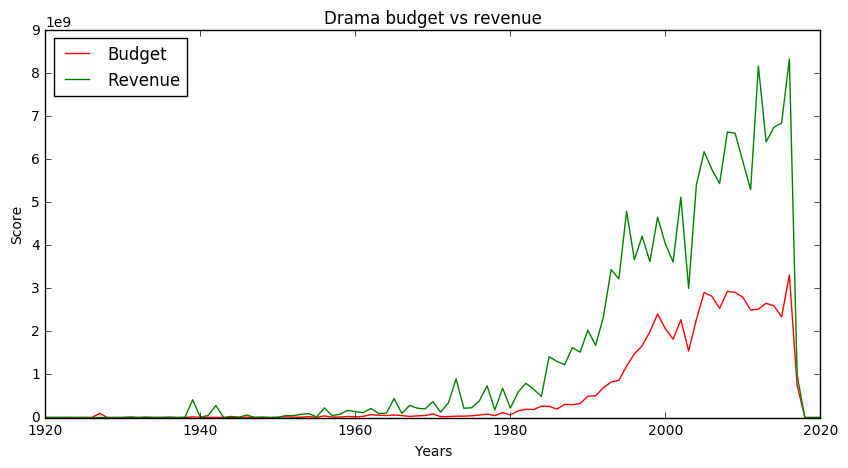

In [7]:
plotFincnceByGenre(tmdb_movies_df, 'Drama')

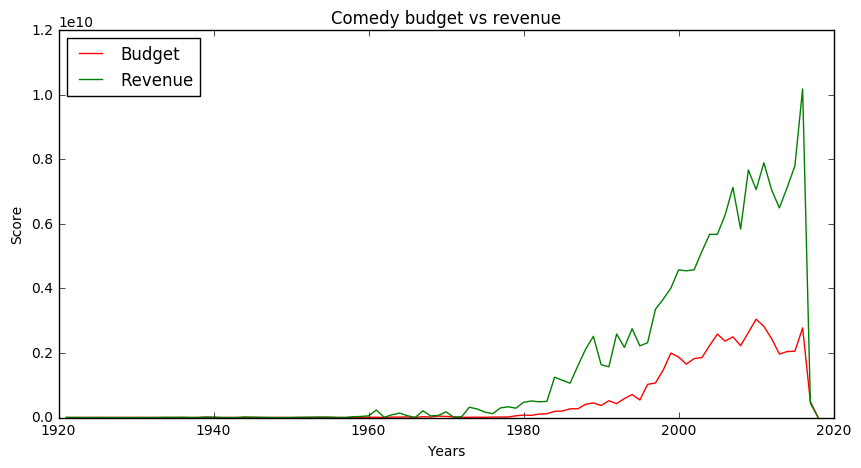

In [8]:
plotFincnceByGenre(tmdb_movies_df, 'Comedy')

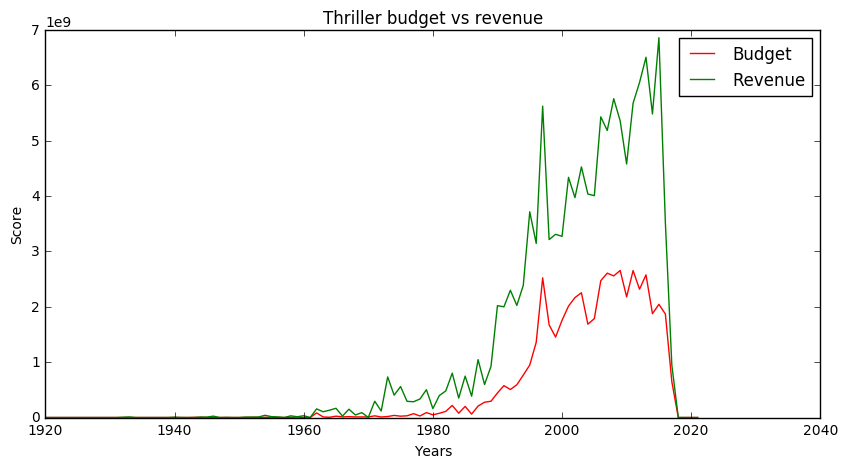

In [9]:
plotFincnceByGenre(tmdb_movies_df, 'Thriller')

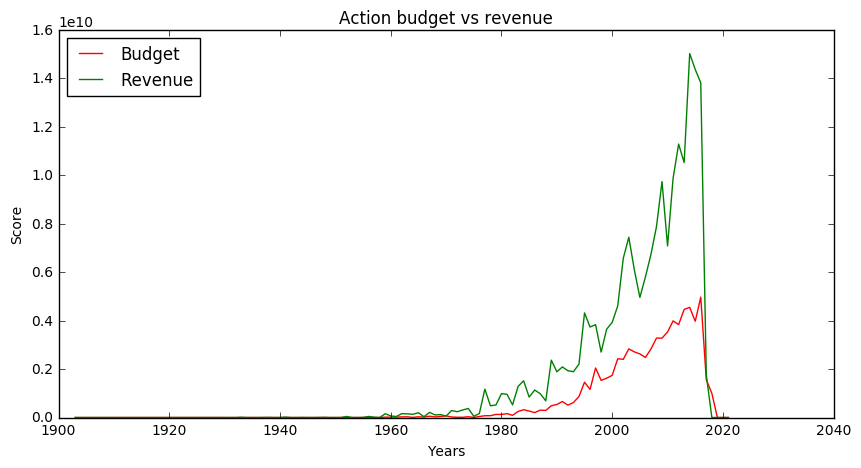

In [10]:
plotFincnceByGenre(tmdb_movies_df, 'Action')

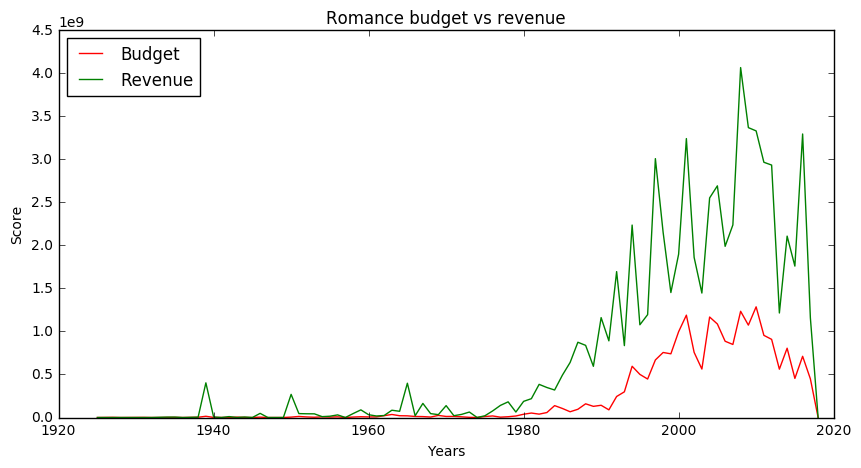

In [11]:
plotFincnceByGenre(tmdb_movies_df, 'Romance')

In [12]:
genre_names = ['Drama', 'Comedy', 'Crime', 'Action', 'Fantasy', 'Western', 'Science Fiction', 'Family']

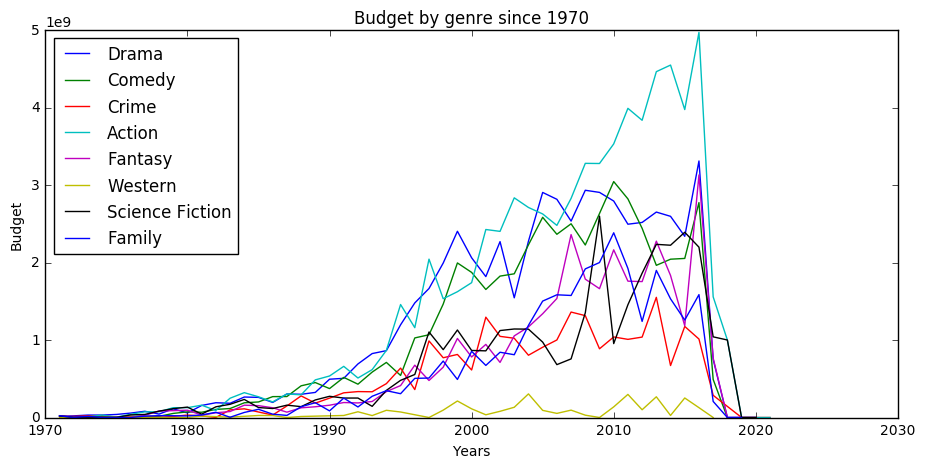

In [13]:
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111)

for genre_name in genre_names:
    d = financeByGenre(tmdb_movies_df[tmdb_movies_df['year'] > 1970], genre_name)
    ax.plot(d.index, d['budget'], label = genre_name)
    ax.legend(loc = 'best')
    
ax.set_xlabel('Years')
ax.set_ylabel('Budget')    
ax.set_title('Budget by genre since 1970')